In [1]:
import os
os.getcwd()
os.chdir('Downloads')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [3]:
data=pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [5]:
data.shape

(9, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [7]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name" as the index.

In [8]:
data1=pd.read_csv('employee.csv',index_col='name')
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.


In [9]:
data1.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [10]:
row = data1.loc[["Jack Morgan","Josh Wills"]]
row

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [11]:
data1.groupby('department').get_group('Sales')

,age,income,gender,department,grade,performance_score
name,,,,,,
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [12]:
data1.groupby('department').get_group('Finance')

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 5. Display employee who has more than 700 performance score.


In [13]:
data1.loc[data1['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [14]:
data1.loc[(data1['performance_score']>500)&(data1['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.


In [15]:
data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [16]:
for i in ['age','income']:
    data1[i]=data1[i].fillna(data1[i].median())

In [17]:
data1['gender'].fillna("M",inplace=True)

In [18]:
data1.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.


Text(0.5, 1.0, 'boxplot of performance_score')

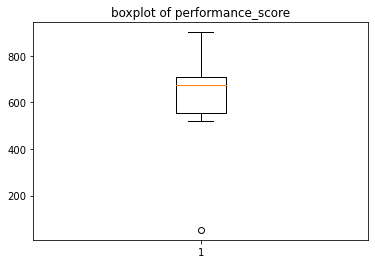

In [19]:
plt.boxplot(data1['performance_score'])
plt.title('boxplot of performance_score')

There is only one outlier in the column 'performance_score'.

In [20]:
Q1=np.percentile(data1['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data1['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data1['performance_score'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)

Q1= 556.0
Q2= 674.0
Q3= 711.0


In [21]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower limit=',low_lim)
print('upper limit=',up_lim)

lower limit= 323.5
upper limit= 943.5


In [22]:
outlier=[]
for i in data1['performance_score']:
    if((i>up_lim)or(i<low_lim)):
        outlier.append(i)
        
outlier

[53]

In [23]:
ind=data1['performance_score']<low_lim
data1.loc[ind].index

Index(['James Authur'], dtype='object', name='name')

In [24]:
data1.drop(['James Authur'],inplace=True)

Text(0.5, 1.0, 'boxplot of performance_score')

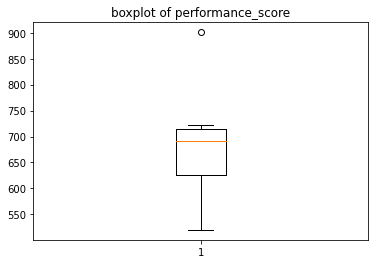

In [25]:
plt.boxplot(data1['performance_score'])
plt.title('boxplot of performance_score')

In [26]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,M,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,M,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 9. Check the gender column and do Dummy encoding.

In [27]:
pd.get_dummies(data1['gender'])

,F,M
name,,
Allen Smith,0,1
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,0,1
Josh Wills,1,0
Leo Duck,0,1


# 10.Do the standard scaling on the feature performance score

In [28]:
data1.describe()

,age,income,performance_score
count,8.000000,8.000000,8.00000
mean,39.875000,52750.000000,680.37500
std,10.343217,24099.496142,116.16729
min,23.000000,16000.000000,520.00000
25%,31.500000,40250.000000,625.75000
50%,45.000000,52000.000000,691.50000
75%,45.000000,62750.000000,714.00000
max,54.000000,98000.000000,901.00000


In [29]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
df=standardisation.fit_transform(data1[['performance_score']])
df=pd.DataFrame(df)
df.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
